In [2]:
import pandas as pd
import tabensemb

tabensemb.setting["matplotlib_usetex"] = True
tabensemb._stream_filters = ["DeprecationWarning"]

from tabensemb.trainer import load_trainer
import matplotlib

trainer = load_trainer("output/composite_database_10082023_snl_msu_doe/2024-02-22-01-08-11-0_composite_snl_msu_doe/trainer.pkl")

Training MSE Loss: 0.1478, R2: 0.9234
Validation MSE Loss: 0.2269, R2: 0.8671
Testing MSE Loss: 0.2783, R2: 0.8559


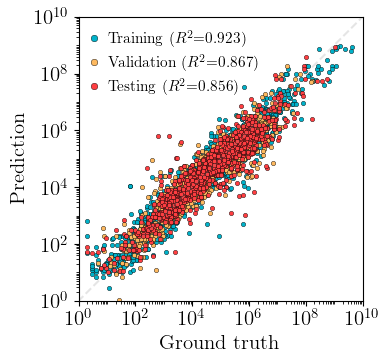

In [39]:
import matplotlib.pyplot as plt
ax = trainer.plot_truth_pred(
    "ThisWork",
    model_name="WideDeep_TabPerceiver_Wrap_NoPCA_KMeans",
    legend_kwargs=dict(frameon=False),
    scatter_kwargs=dict(s=10, linewidth=0.3),
    figure_kwargs=dict(figsize=(4, 4)),
    savefig_kwargs=dict(dpi=500),
    clr=[tabensemb.utils.global_palette[0], tabensemb.utils.global_palette[2], tabensemb.utils.global_palette[1]],
    save_show_close=False,
    upper_lim=10

)
[x.set(fontsize=15) for x in ax.get_yticklabels()]
[x.set(fontsize=15) for x in ax.get_xticklabels()]
# ax.get_xticklabels().set(fontsize=15)
handles, labels = ax.get_legend_handles_labels()
labels = [x.replace(" dataset", "") for x in labels]
ax.legend(handles=handles, labels=labels, loc="upper left", markerscale=1.5, handlelength=0.2, handleheight=0.9,frameon=False, fontsize=11)
ax.set_yticks([10**x for x in range(0, 11, 2)])
ax.set_xticks([10**x for x in range(0, 11, 2)])
# ax.set_major_locator()
ax.set_xlabel(ax.get_xlabel(), fontsize=15)
ax.set_ylabel(ax.get_ylabel(), fontsize=15)
plt.savefig(f"{trainer.project_root}/WideDeep_TabPerceiver_Wrap_NoPCA_KMeans.jpg", dpi=500)
plt.show()

plt.close()

In [27]:
ax.get_xticks()

array([1.e-02, 1.e+00, 1.e+02, 1.e+04, 1.e+06, 1.e+08, 1.e+10, 1.e+12])

In [1]:
import pandas as pd
import torch
import tabensemb
tabensemb.setting["matplotlib_usetex"] = True
tabensemb._stream_filters = ["DeprecationWarning"]
import matplotlib.pyplot as plt

from src.trainer import FatigueTrainer

device = "cuda" if torch.cuda.is_available() else "cpu"

configfile = "composite_test"
trainer = FatigueTrainer(device=device, project="analyse")
trainer.load_config(
    configfile,
    manual_config={
        "database": "composite_database_10082023",
        "data_splitter": "RandomSplitter",
    },
)
trainer.load_data()

The project will be saved to output/analyse/2024-02-24-16-21-59-0_composite_test
Dataset size: 4062 1354 1354
Data saved to output/analyse/2024-02-24-16-21-59-0_composite_test (data.csv and tabular_data.csv).


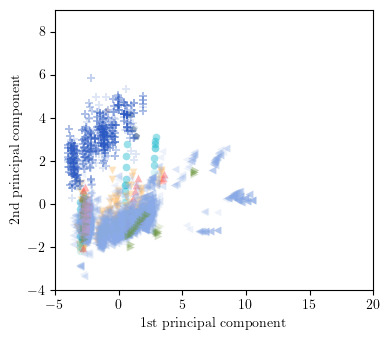

In [63]:
ax = trainer.plot_pca_2d_visual(features=trainer.datamodule.cont_feature_names, select_by_value_kwargs=dict(selection={"Data source": "SNL/MSU/DOE"}), clr=tabensemb.utils.global_palette[:3] + ["#89AAE6"] + tabensemb.utils.global_palette[4:], scatter_kwargs=dict(alpha=0.15, s=30, linewidth=0), category="R-value", save_show_close=False, figure_kwargs=dict(figsize=(4,3.5)))
ax.legend().remove()

# plt.savefig(f"{trainer.project_root}/pca2d.jpg", dpi=500)
# ax.spines["right"].set_linewidth(0)
# ax.spines["top"].set_linewidth(0)
ax.set_xlim([-5, 20])
ax.set_ylim([-4, 9])
plt.savefig(f"{trainer.project_root}/pca2d.jpg", dpi=500)

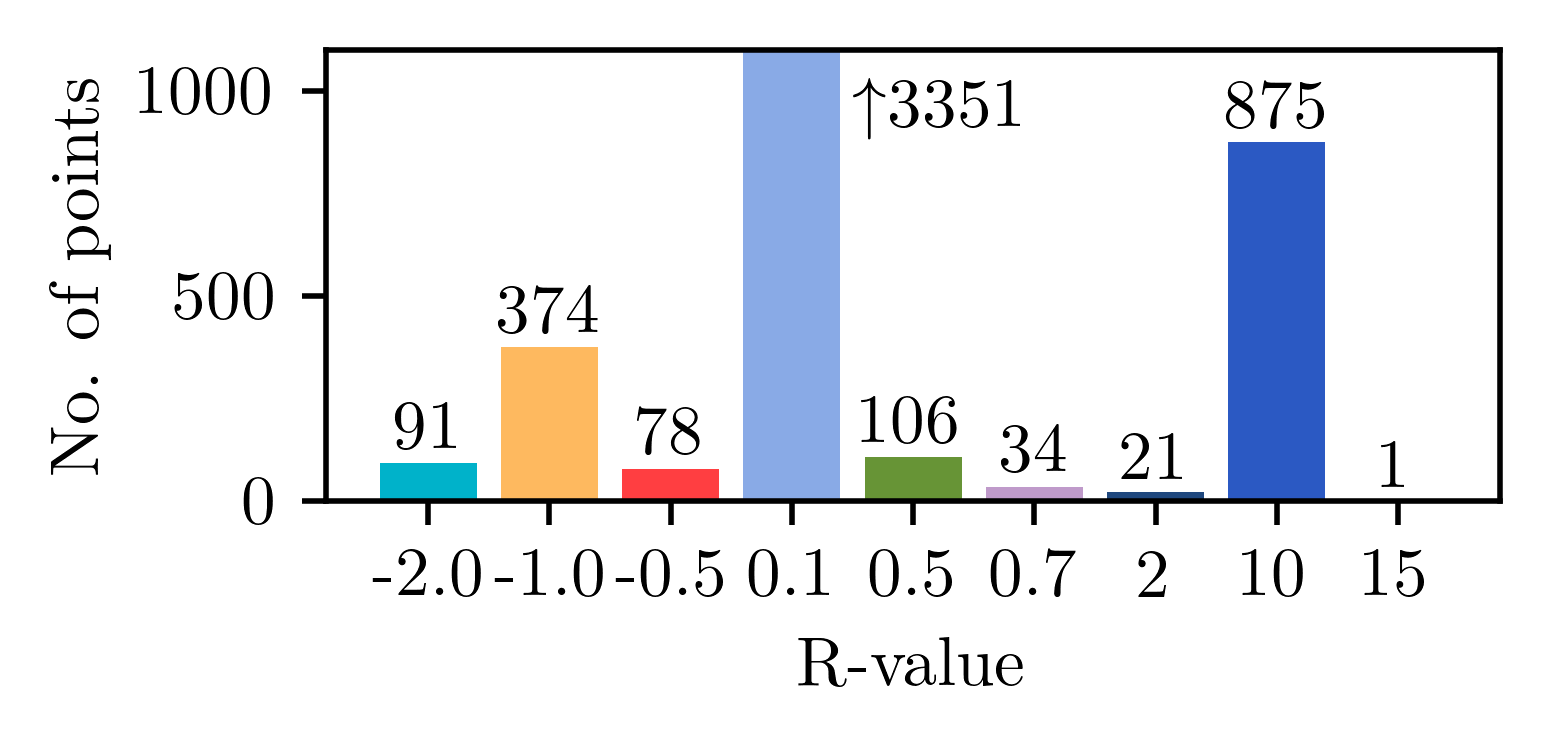

In [64]:
import numpy as np
df_r = trainer.df.loc[trainer.datamodule.select_by_value(selection={"Data source": "SNL/MSU/DOE"}), :]
unique_r = np.unique(df_r["R-value"], return_counts=True)
plt.figure(figsize=(3.2, 1.6), dpi=500)
ax = plt.subplot(111)
ax.bar(x=np.arange(len(unique_r[0])), height=unique_r[1], color=tabensemb.utils.global_palette[:3] + ["#89AAE6"] + tabensemb.utils.global_palette[4:])

for x, n in zip(np.arange(len(unique_r[0])), unique_r[1], ):
    if n > 1100:
        ax.text(x+0.5, 1030, r"$\uparrow$"+str(n), ha="left", va="top")
    else:
        ax.text(x, n, str(n), ha="center", va="bottom")

ax.set_xticks(np.arange(len(unique_r[0])))
ax.set_xticklabels([x if x < 1 else int(x) for x in unique_r[0]])
ax.set_ylim([0, 1100])
ax.set_xlabel("R-value")
ax.set_ylabel("No. of points")
plt.savefig(f"{trainer.project_root}/n_rvalue.jpg", dpi=500)
plt.show()

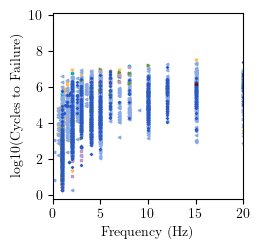

In [5]:
plt.figure(figsize=(2.7, 2.6))
ax = plt.subplot(111)
trainer.plot_scatter(x_col="Frequency", y_col="log10(Cycles to Failure)", category="R-value", scatter_kwargs=dict(s=3), ax=ax, select_by_value_kwargs=dict(selection={"Data source": "SNL/MSU/DOE"}), clr=tabensemb.utils.global_palette[:3] + ["#89AAE6"] + tabensemb.utils.global_palette[4:])
ax.set_xlim([0, 20])
ax.legend().remove()
ax.set_xlabel(f"Frequency (Hz)")
ax.set_ylabel("log10(Cycles to Failure)")
plt.savefig(f"{trainer.project_root}/freq_cycle.jpg", dpi=500)

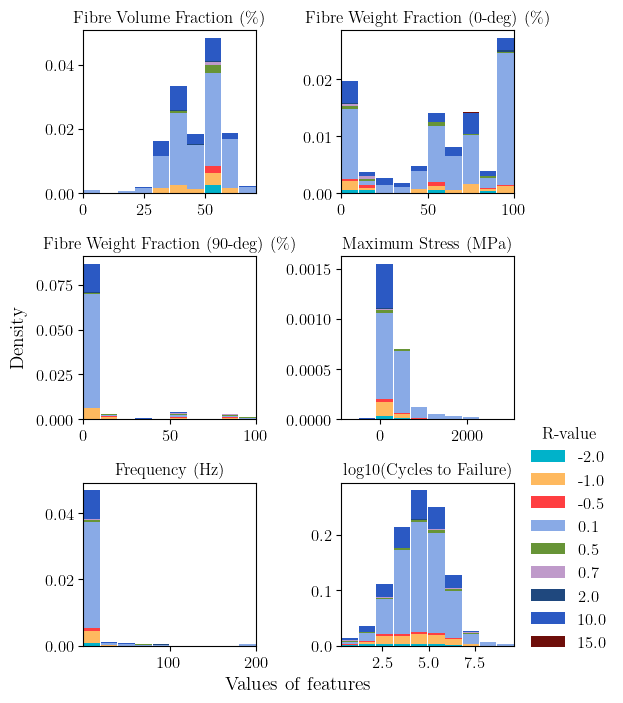

In [4]:
trainer.datamodule.set_feature_names(["Fiber Volume Fraction", "Fiber Weight Fraction (0-deg)", "Fiber Weight Fraction (90-deg)", "Maximum Stress", "Frequency"])
hist = trainer.plot_hist_all(select_by_value_kwargs=dict(selection={"Data source": "SNL/MSU/DOE"}), get_figsize_kwargs=dict(max_col=2, height_per_item=2.5, max_width=7), save_show_close=False, category="R-value", clr=tabensemb.utils.global_palette[:3] + ["#89AAE6"] + tabensemb.utils.global_palette[4:])

for ax, unit in zip(hist.axes[:len(trainer.all_feature_names)+1], ["\%", "\%", "\%", "MPa", "Hz", None]):
    if unit is not None:
        # pass
        ax.set_title(f"{ax.get_title()} ({unit})", fontsize=12)
    else:
        ax.set_title(ax.get_title(), fontsize=12)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend().remove()
ax = hist.axes[-1]
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.25, 0.38), title="R-value", frameon=False)
ax.set_xlabel(f"Values of features", fontsize=14)
ax.set_ylabel("Density\n", fontsize=14)
hist.savefig(f"{trainer.project_root}/hist.jpg", dpi=500)